<a href="https://colab.research.google.com/github/leticiacanton/Tasks-Pos-Graduacao-em-Data-Science/blob/main/CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Além das bibliotecas ``Numpy``, ``Pandas`` e ``Matplotlib``, vamos utilizar ``keras`` de ``tensorflow``.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow import keras

print(f'Keras:{keras.__version__}')  # version

Keras:2.12.0


> **Task 3.1:** Realize a classificação na base CIFAR-10.

- Utilize a arquitetura seguinte, que é semelhante à VGG-16, porém mais simples, com menor número de camadas e imagens de entrada de dimensões mais reduzidas.São 6 camadas de convolução, duas de pooling, uma flatten e duas FC (fully-connected). Use um window size de (2 x 2) para a camada de pooling. Atenção para a função de ativação SoftMax na última camada FC.

- Analise o comportamento do treinamento, verificando as curvas de loss e accuracy nos conjuntos de treinamento e validação. Há sinal de overfitting? Avalie a predição no conjunto de testes. Qual foi o desempenho?

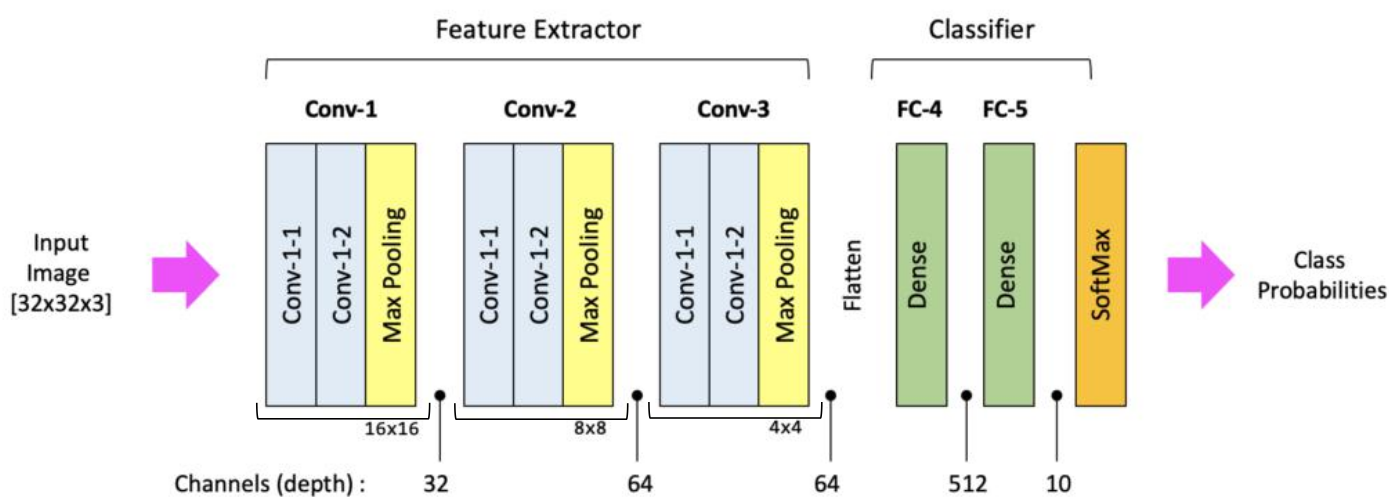

In [ ]:
# Diminui o tamanho do kernel, nossas imagens são mais complexas
kernel = (3, 3)
pool = (2, 2)  # pool size 2x2

# Aqui ajustei conforme a arquitetura da figura
model = keras.models.Sequential([
    # primeiro grupo de camadas
    # na primeira layer precisamos especificar a entrada
    keras.layers.Conv2D(filters=32, kernel_size = kernel, padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=32, kernel_size = kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool), ## esse grupo de camadas tem saida 16x16 pq o pooling 2x2 reduz a resolução 32x32 pela metade

    # segundo grupo de camadas
    keras.layers.Conv2D(filters=64, kernel_size = kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size = kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool), ## esse grupo de camadas tem saida 8x8 pq o pooling 2x2 reduz a resolução 16x16 pela metade

    # terceiro grupo de camadas, igual ao anterior
    keras.layers.Conv2D(filters=64, kernel_size = kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size = kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool), ## esse grupo de camadas tem saida 4x4 pq o pooling 2x2 reduz a resolução 8x8 pela metade

    keras.layers.Flatten(),

    # Seguindo nossa arquitura aqui é 512
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

As camadas do modelo também podem ser acessadas individualmente.

In [ ]:
print(model.layers)

conv1 = model.layers[0]  # first convolutional layer

print(f'\nFirst convolutional layer name: {conv1.name}')

[<keras.layers.convolutional.conv2d.Conv2D object at 0x7fcb2c38bf70>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcb2c38a7a0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fcb2c389cf0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcb2c3e2800>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcb2c3e1a80>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fcb2c38b610>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcb2c365000>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fcb2c367940>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fcb2c405e70>, <keras.layers.reshaping.flatten.Flatten object at 0x7fcb2c56a380>, <keras.layers.core.dense.Dense object at 0x7fcb2c3a0640>, <keras.layers.core.dense.Dense object at 0x7fcb2c3a0a00>]

First convolutional layer name: conv2d_18


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

E os parâmetros de uma camada pode ser obtidos com ``get_weights``.

Perceba os pesos (``weights``) inicializados randomicamente e os termos bias com zero.

In [ ]:
weights, biases = conv1.get_weights()

print(f'Layer weights shape:\n{weights.shape}')
print(f'\nLayer weights:\n{weights}')

print(f'\nLayer biases shape:\n{biases.shape}')
print(f'\nBiases:\n{biases}')

Layer weights shape:
(3, 3, 3, 32)

Layer weights:
[[[[-7.13609681e-02 -5.04817069e-03 -2.35071555e-02 -5.13395667e-03
    -1.22932762e-01  6.44062161e-02  1.10521600e-01 -1.35736167e-03
    -2.59871632e-02 -6.88731670e-05 -7.33079165e-02  1.28035530e-01
    -3.97221744e-03  6.16991371e-02 -4.58979085e-02  4.47545946e-03
    -6.60062209e-02  1.02259934e-01  3.46214771e-02 -1.06083289e-01
    -1.07191861e-01 -7.16799423e-02  5.94369918e-02  2.75646597e-02
     9.24295187e-03 -5.59160709e-02 -1.89713463e-02 -7.36849084e-02
    -3.95679623e-02 -2.62683332e-02 -5.21899164e-02 -1.54699385e-03]
   [-1.27444223e-01 -1.03695616e-01 -4.20815721e-02 -2.40704194e-02
     7.28023350e-02 -2.77609304e-02 -1.09954022e-01  3.39496583e-02
     4.95800972e-02 -5.31079322e-02 -2.71258056e-02 -9.14038941e-02
     6.74228817e-02 -5.87127209e-02 -1.22888014e-01  3.65558863e-02
     2.60708779e-02 -4.48165908e-02  6.08704239e-02 -1.05069920e-01
    -1.14134848e-02 -7.74133950e-02  2.13392228e-02 -9.62850377e

Importação de um *Dataset*
--

O conjunto de dados **CIFAR-10** (https://www.cs.toronto.edu/~kriz/cifar.html) é uma coleção de 60.000 imagens coloridas de 32x32 pixels, divididas em 10 classes diferentes, com 6.000 imagens por classe. Essas classes incluem aviões, automóveis, pássaros, gatos, veados, cães, sapos, cavalos, navios e caminhões, e são mutuamente exclusivas.



In [ ]:
cifar = keras.datasets.cifar10

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = cifar.load_data()

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Para criar um conjunto adicional de validação, foram utilizadas 5000 instâncias, o que é suficiente para o tamanho do dataset (60k).

E como vamos utilizar uma CNN com o algoritmo de treinamento Gradient Descent (GD), vamos primeiramente normalizar as features, colocando os pixels na escala $0-1$.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Compilação
--
Vamos inicialmente rodar o otimizador com um learning rate de 0.001.

In [ ]:
# Adam optimizer
from tensorflow.keras.optimizers import Adam

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['sparse_categorical_accuracy'])


Treinamento
--

In [ ]:
# voltei para backend de GPU, vcs tinham setado para TPU
# para rodar em TPU precisa de um preparo especial

history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=256, ## determina quantas amostras são usadas em cada etapa de treinamento para atualizar os pesos da rede
                    # steps_per_epoch=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
176/176 [==============================] - 7s 24ms/step - loss: 1.7257 - sparse_categorical_accuracy: 0.3662 - val_loss: 1.4537 - val_sparse_categorical_accuracy: 0.4790
Epoch 2/30
176/176 [==============================] - 4s 20ms/step - loss: 1.2615 - sparse_categorical_accuracy: 0.5491 - val_loss: 1.1063 - val_sparse_categorical_accuracy: 0.6044
Epoch 3/30
176/176 [==============================] - 4s 20ms/step - loss: 1.0280 - sparse_categorical_accuracy: 0.6354 - val_loss: 0.9332 - val_sparse_categorical_accuracy: 0.6696
Epoch 4/30
176/176 [==============================] - 4s 22ms/step - loss: 0.8711 - sparse_categorical_accuracy: 0.6922 - val_loss: 0.8751 - val_sparse_categorical_accuracy: 0.6842
Epoch 5/30
176/176 [==============================] - 4s 21ms/step - loss: 0.7541 - sparse_categorical_accuracy: 0.7354 - val_loss: 0.8444 - val_sparse_categorical_accuracy: 0.7034
Epoch 6/30
176/176 [==============================] - 4s 21ms/step - loss: 0.6818 - sparse_cate

> Avaliação do Treinamento

Vamos plotar as curvas de acurácia e *loss*.

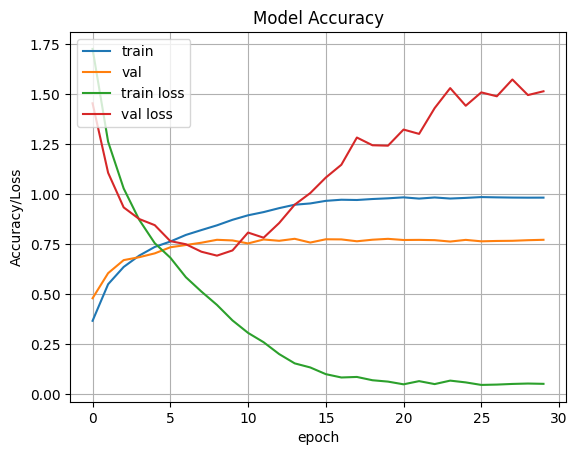

In [ ]:
# Accuracy x Epoch plot
plt.grid(True)
# plt.gca().set_ylim(0, 2)

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy/Loss')
plt.xlabel('epoch')

plt.legend(['train', 'val', 'train loss', 'val loss'], loc='upper left')

plt.show()

# Note o comportamento das curvas de loss
# train (verde) e val (vermelho)

# veja que a acurácia em train atingiu ~100%
# mas val estacionou em ~75%
# enquanto loss de train caiu, loss de val subiu

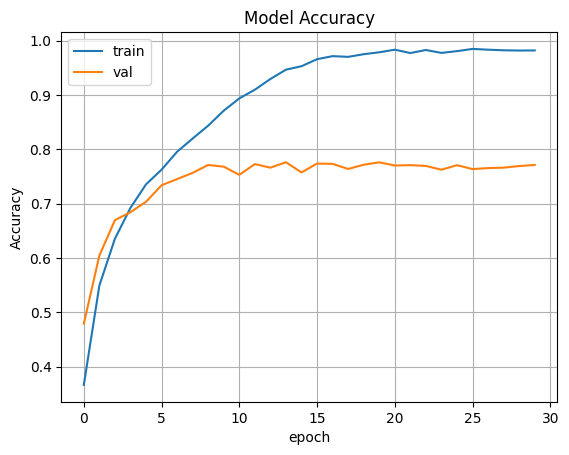

In [ ]:
# Accuracy x Epoch plot
plt.grid(True)
# plt.gca().set_ylim(0, 2)

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'val' ], loc='upper left')

plt.show()

O gráfico que relaciona a curva de loss (perda de treinamento) com a curva de validation loss (perda de validação) mostra que, quando se adiciona um número maior de exemplos para o treinamento, a perda de validação começar a aumentar, o que representa um sinal de overfitting. O overfitting ocorre quando o modelo se ajusta excessivamente aos dados de treinamento, memorizando eles ao invés de aprender os padrões gerais, o que pode levar a um desempenho inferior em dados não vistos.

Portanto, quando a perda de treinamento e a perda de validação não se aproximam, isso mostra que o modelo não está bem ajustado aos dados de treinamento e, consequentemente, não tem um bom desempenho em dados não vistos.

Outro indicativo de overfitting no modelo é que a acurácia no treinamento chega a 98%, enquanto na validação chega apenas em 77%.

Vamos a seguir rodar o modelo no conjunto de teste para visualização da acertabilidade. Vamos utilizar 30 épocas e um learning rate de 0.001.

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)

print(f'Test loss: {scores[0]}')
print(f'Test accuracy: {scores[1]}')

# é esperando algo baixo. Com o dropout deve subir, nesse modelo,  para 70 - 80%

313/313 [==============================] - 1s 3ms/step - loss: 410.5869 - sparse_categorical_accuracy: 0.6844
Test loss: 410.5869140625
Test accuracy: 0.6844000220298767


Classificação
--

Uma vez treinado o modelo podemos fazer predições com o método ``predict``.

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_new = X_test[:10000]
y_proba = model.predict(X_new)

print(f'Probability scores:\n {y_proba.round(2)}')


313/313 [==============================] - 1s 2ms/step
Probability scores:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


O modelo estima uma probabilidade por classe.

Mas, quais são essas classes?

In [ ]:
classes_y = np.argmax(y_proba, axis=1)

print(classes_y)

print(f'Predicted classes:\n {np.array(class_names)[classes_y]}')

[3 8 8 ... 5 1 7]
Predicted classes:
 ['cat' 'ship' 'ship' ... 'dog' 'automobile' 'horse']


Vamos verificar o comportamento da nossa CNN em todo o conjunto de teste. Lembrando que temos 6000 instâncias por classe.

313/313 [==============================] - 1s 2ms/step
Accuracy:0.68

[[876  16   8  13   4   1   1   9  48  24]
 [ 19 861   0  10   0   1   2   2  34  71]
 [177  23 453 108  32  75  20  52  29  31]
 [ 89  29  27 524  23 148  25  51  48  36]
 [ 92  24  41 127 450  50  22 134  34  26]
 [ 43  11  17 148  18 624  13  87  18  21]
 [ 42  30  42 130  23  59 570  19  56  29]
 [ 53  12   9  42  23  32   1 784  14  30]
 [ 96  18   2   6   3   4   0   4 850  17]
 [ 39  57   2   8   1   3   1  12  25 852]]


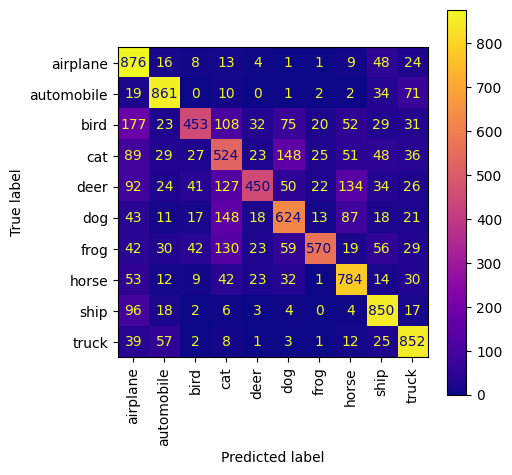

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_proba = model.predict(X_test)

test_pred = np.argmax(y_proba, axis=1)

# Accuracy
acc = accuracy_score(test_pred, y_test)
print(f'Accuracy:{acc:.2f}\n')

# Confusion matrix
cm = confusion_matrix(y_test, test_pred)
print(confusion_matrix(y_test, test_pred))


fig, ax = plt.subplots(figsize=(5, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred, display_labels=class_names, xticks_rotation="vertical",
    ax=ax, colorbar=True, cmap="plasma")

plt.show()

No conjunto de teste, a acurácia foi de 63%. Pode-se perceber que o modelo ainda erra bastante nas classes `cat` (confundindo principalmente com `dog`, e vice-versa), `bird` (confundindo com `airplane`, o que até faz sentido devido às características das imagens) e `deer` com `horse` (o que também faz sentido devido Às características físicas dos animais serem semelhantes).

Todavia o overfitting é uma preocupação, mesmo que a acurácia nos dados de teste tenha sido boa. Sendo assim, o recomendado seria aprimorar o modelo, para tentar melhorar sua capacidade de generalização e reduzir o impacto do overfitting.

> **Task 3.2:** Considere o uso de uma estratégia de regularização chamada Dropout. Basicamente neurônios randômicamente selecionados são descartados durante o treinamento. No Keras há a classe Dropout que recebe como parâmetro o percentual de neurônios a serem descartados (0 - 1). Essa camada normalmente é disposta após a polling layer e elimina neurônios do feature map. Também pode ser incluída após uma camada dense.

- Crie uma novo modelo com Dropout e avalie o desempenho no treinamento. Utilize a arquitetura mostrada no diagrama seguinte, com dropout de 25% na três primeiras camadas e 50% na última.

In [ ]:
from tensorflow.keras.layers import Conv2D, Dropout

In [ ]:
kernel = (3, 3)
pool = (2, 2)

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size = kernel, padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(filters=32, kernel_size = kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),
    keras.layers.Dropout(rate=0.25),

    keras.layers.Conv2D(filters=64, kernel_size = kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size = kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),
    keras.layers.Dropout(rate=0.25),

    keras.layers.Conv2D(filters=64, kernel_size = kernel, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size = kernel, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=pool),
    keras.layers.Dropout(rate=0.25),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(rate=0.50),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [ ]:
conv1 = model.layers[0]
weights, biases = conv1.get_weights()

In [ ]:
cifar = keras.datasets.cifar10

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = cifar.load_data()

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
# Adam optimizer
from tensorflow.keras.optimizers import Adam

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['sparse_categorical_accuracy'])


In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=256,
                    ##steps_per_epoch=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
176/176 [==============================] - 8s 28ms/step - loss: 1.8750 - sparse_categorical_accuracy: 0.3017 - val_loss: 1.5723 - val_sparse_categorical_accuracy: 0.4262
Epoch 2/20
176/176 [==============================] - 5s 27ms/step - loss: 1.4236 - sparse_categorical_accuracy: 0.4800 - val_loss: 1.1913 - val_sparse_categorical_accuracy: 0.5710
Epoch 3/20
176/176 [==============================] - 5s 26ms/step - loss: 1.2277 - sparse_categorical_accuracy: 0.5588 - val_loss: 1.0353 - val_sparse_categorical_accuracy: 0.6296
Epoch 4/20
176/176 [==============================] - 5s 26ms/step - loss: 1.0809 - sparse_categorical_accuracy: 0.6139 - val_loss: 0.9513 - val_sparse_categorical_accuracy: 0.6614
Epoch 5/20
176/176 [==============================] - 5s 27ms/step - loss: 0.9913 - sparse_categorical_accuracy: 0.6478 - val_loss: 0.8769 - val_sparse_categorical_accuracy: 0.6908
Epoch 6/20
176/176 [==============================] - 5s 26ms/step - loss: 0.9190 - sparse_cate

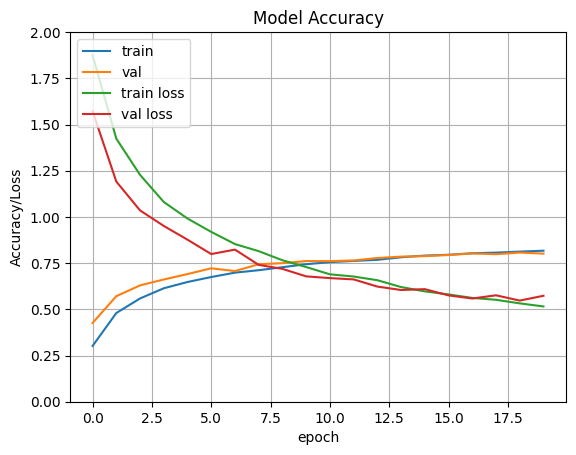

In [ ]:
# Accuracy x Epoch plot
plt.grid(True)
plt.gca().set_ylim(0, 2)

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy/Loss')
plt.xlabel('epoch')

plt.legend(['train', 'val', 'train loss', 'val loss'], loc='upper left')

plt.show()

O plot das curvas de perda de treinamento e de perda de validação evidenciou que a adição do dropout à CNN eliminou o problema que estavamos tendo com overfitting. Isto porque a medida que as épocas aumentam e mais dados são fornecidos para o modelo treinar, a distância entre as curvas diminuem.

Como a curva de perda de treinamento mede a capacidade do modelo se ajustar aos dados de treinamento e a perda de validação mede a capacidade do modelo de se adaptar a novos dados, diminuir a distância entre essas duas curvas indica que o modelo se ajusta bem tanto aos dados de treinamento quanto a dados não vistos.

Esse resultado do plot foi obtido usando 20 épocas e um learning rate de 0.001. Com esses parâmetros, foi obtido uma acurácia de treinamento de 81%.

Iremos testar esse modelo no conjunto de teste.

In [ ]:
X_new = X_test[:10000]
y_proba = model.predict(X_new)

print(f'Probability scores:\n {y_proba.round(2)}')


313/313 [==============================] - 1s 2ms/step
Probability scores:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
classes_y = np.argmax(y_proba, axis=1)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

313/313 [==============================] - 1s 2ms/step
Accuracy:0.55

[[869  45   0   2   0   3   0  12   9  60]
 [ 15 913   0   0   0   2   0   4   3  63]
 [369  36 179  94  21  88   2 129   9  73]
 [176  34   6 349  20 136   1 151  20 107]
 [147  15   8  96 258  63   1 329  11  72]
 [ 96  14   5 102   9 552   0 156  10  56]
 [110  67   7 124  40 108 216 141  39 148]
 [ 57   8   0  16   6  16   0 840   4  53]
 [312  93   0   2   1   2   0   6 494  90]
 [ 31  82   1   2   0   1   0   7   3 873]]


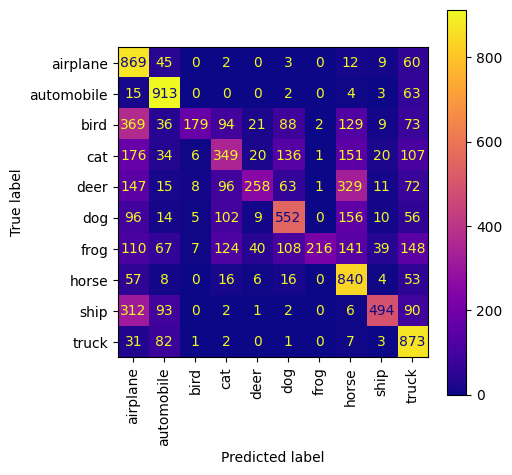

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_proba = model.predict(X_test)

test_pred = np.argmax(y_proba, axis=1)

# Accuracy
acc = accuracy_score(test_pred, y_test)
print(f'Accuracy:{acc:.2f}\n')

# Confusion matrix
cm = confusion_matrix(y_test, test_pred)
print(confusion_matrix(y_test, test_pred))


fig, ax = plt.subplots(figsize=(5, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred, display_labels=class_names, xticks_rotation="vertical",
    ax=ax, colorbar=True, cmap="plasma")

plt.show()

Foi obtido uma acurácia de 55% na classificação. O que é performance razoável devido à complexidade do dataset

Percebe-se que o modelo ainda comete muitos erros de classificação, especialmente nas classes `bird`, `cat`, `deer` e `frog`.

`deer`, por exemplo, é muito confundido com `horse`, possivelmente devido a semelhanças físicas entre os animais. Provavelmente seja o mesmo motivo pelo qual `cat` é confundido com `dog`. Além disso, `bird` é confundido com `airplane`, devido a semelhanças estruturais (asas)

Dado que o problema de overfitting foi resolvido, indicando que o modelo está bem estruturado, a melhora da acurácia no teste poderia ocorrer utilizando modelos já treinados com mais imagens (VGG16, por exemplo), utilizando o `transfer learning`. E, ainda, tunar os hiperparâmetros desse novo modelo, permitindo com que algumas camadas iniciais da rede sejam novamente treinadas.